In [3]:
# !pip install wordcloud
# !pip install gensim
# !pip install pyLDAvis
# !pip install nltk

In [57]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
import ssl
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('stopwords')
from nltk.corpus import stopwords

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_notes = pd.read_csv('/Users/admin/Documents/GeorgiaTech-MSA/Academics/Courses/Fall22/ML7641/Project/Data/input_output_processed.csv')
df_notes.head()

df_notes.drop(columns = 'Unnamed: 0', inplace=True)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df_notes.head()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history,note_and_feature_text,output_text
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...,Definition: You are given paragraph as input. ...,dad with recent heart attcak
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...,Definition: You are given paragraph as input. ...,"mom with ""thyroid disease"
2,00016_002,0,16,2,['chest pressure'],['203 217'],Chest-pressure,HPI: 17yo M presents with palpitations. Patien...,Definition: You are given paragraph as input. ...,chest pressure
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...,Definition: You are given paragraph as input. ...,"intermittent episodes, episode"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],Lightheaded,HPI: 17yo M presents with palpitations. Patien...,Definition: You are given paragraph as input. ...,felt as if he were going to pass out


In [7]:
df_notes.shape

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(14300, 10)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


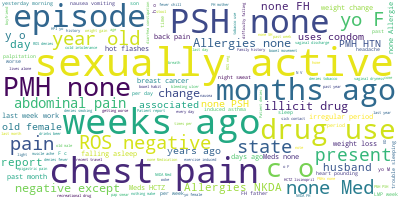

In [55]:
# Join the different processed titles together.
long_string = ','.join(list(df_notes['pn_history'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=2000, contour_width=8, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [9]:
stop_words = stopwords.words('english')
stop_words.extend(['with', 'of', 'a', 'an', 'had', 'but', 'were', 'and', 'in', 'or'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_notes.pn_history.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['hpi', 'yo', 'presents', 'palpitations', 'patient', 'reports', 'months', 'intermittent', 'episodes', 'heart', 'beating', 'pounding', 'chest', 'days', 'ago', 'soccer', 'game', 'episode', 'time', 'chest', 'pressure', 'felt', 'going', 'pass', 'lose', 'conciousness', 'note', 'patient', 'endorses', 'abusing']


In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [13]:
# print([(i,id2word[i]) for i in range(0,30)])

[(0, 'abdominal'), (1, 'abusing'), (2, 'active'), (3, 'adderall'), (4, 'adderrall'), (5, 'ago'), (6, 'attcak'), (7, 'beating'), (8, 'bowel'), (9, 'breath'), (10, 'changes'), (11, 'chest'), (12, 'chills'), (13, 'college'), (14, 'conciousness'), (15, 'condoms'), (16, 'dad'), (17, 'date'), (18, 'days'), (19, 'denies'), (20, 'diaphoresis'), (21, 'disease'), (22, 'drinks'), (23, 'endorses'), (24, 'episode'), (25, 'episodes'), (26, 'fatigue'), (27, 'felt'), (28, 'fevers'), (29, 'fhx')]


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# id2word

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
corpus_notes = np.array(corpus)
corpus_notes.shape

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-7a5c524fd989>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corpus_notes = np.array(corpus)


(14300,)

In [41]:
x = min([len(corpus[i]) for i in range(len(corpus))])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# corpus[0]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# s = corpus[0].sort(key=lambda x: x[1], reverse = True) 
# print(s)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
top_5_each = []
for i in range(len(corpus)):
    corpus[i].sort(key=lambda x: x[1], reverse = True)
    top_5_each.append(corpus[i][0:5])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
top_5_each[0]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(10, 3), (23, 3), (32, 3), (4, 2), (11, 2)]

In [ ]:
id2word

LDA model training
To keep things simple, we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [68]:
# number of topics
num_topics = np.arange(5,21)
print(num_topics)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)
perplexity_scores= []
coherence_scores = []
for i in list(num_topics):                               
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
    doc_lda = lda_model[corpus]
    topics = lda_model.print_topics()
    perplexity_scores.append((i, lda_model.log_perplexity(corpus)))
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append((i, coherence_lda))
    # print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
    
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
perplexity_scores

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(5, -7.200103005717839),
 (6, -7.263299356356218),
 (7, -7.381465442499188),
 (8, -7.387944935432143),
 (9, -7.531030688900502),
 (10, -7.640532125140613),
 (11, -7.793596208577822),
 (12, -7.988593869411682),
 (13, -8.306423601685324),
 (14, -8.8723031067022),
 (15, -9.872213905051508),
 (16, -11.412207876684334),
 (17, -13.770002695175728),
 (18, -16.49774094035649),
 (19, -18.012768058004315),
 (20, -18.469605988937506)]

In [71]:
coherence_scores

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(5, 0.5466452631450318),
 (6, 0.5215968522536325),
 (7, 0.5953138803793966),
 (8, 0.5277556577956173),
 (9, 0.5000037477476615),
 (10, 0.46311931424759284),
 (11, 0.5165634374511323),
 (12, 0.47786017406405046),
 (13, 0.44410929930416543),
 (14, 0.437793627028689),
 (15, 0.4496195140356102),
 (16, 0.45406046839152947),
 (17, 0.49734735721791),
 (18, 0.4474587513004826),
 (19, 0.43473087460116117),
 (20, 0.4339192575793585)]

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Perplexity Score with Number of Topics')

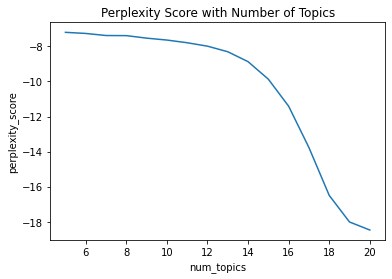

In [74]:
import seaborn as sns
df_perplexity = pd.DataFrame()
df_perplexity['num_topics'] = pd.Series([i[0] for i in perplexity_scores])
df_perplexity['perplexity_score'] = pd.Series([i[1] for i in perplexity_scores])

df_coherence = pd.DataFrame()
df_coherence['num_topics'] = pd.Series([i[0] for i in coherence_scores])
df_coherence['coherence_score'] = pd.Series([i[1] for i in coherence_scores])

sns.lineplot(data=df_perplexity, x="num_topics", y="perplexity_score").set_title("Perplexity Score with Number of Topics")

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Coherence Score with Number of Topics')

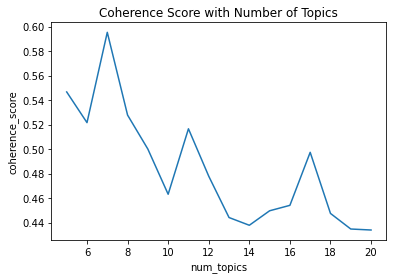

In [75]:
sns.lineplot(data=df_coherence, x="num_topics", y="coherence_score").set_title("Coherence Score with Number of Topics")

Analyzing LDA model results
Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

Better understanding and interpreting individual topics, and
Better understanding the relationships between the topics.

In [82]:
final_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=7, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
pprint(final_lda_model.print_topics())

[(0,
  '0.089*"pain" + 0.038*"worse" + 0.038*"tylenol" + 0.035*"morning" + '
  '0.033*"bending" + 0.030*"head" + 0.029*"dull" + 0.028*"marijuana" + '
  '0.025*"photophobia" + 0.020*"drinks"'),
 (1,
  '0.046*"ibuprofen" + 0.039*"constant" + 0.028*"neck" + 0.024*"ocp" + '
  '0.023*"pain" + 0.021*"vomiting" + 0.020*"condoms" + 0.020*"none" + '
  '0.020*"uses" + 0.019*"ago"'),
 (2,
  '0.105*"headache" + 0.073*"yesterday" + 0.031*"none" + 0.023*"weekends" + '
  '0.021*"episodes" + 0.020*"feels" + 0.020*"nausea" + 0.019*"states" + '
  '0.019*"works" + 0.017*"severe"'),
 (3,
  '0.059*"son" + 0.041*"htn" + 0.036*"wine" + 0.036*"asleep" + 0.034*"breast" '
  '+ 0.032*"mother" + 0.028*"husband" + 0.028*"hctz" + 0.028*"cancer" + '
  '0.025*"glasses"'),
 (4,
  '0.069*"denies" + 0.041*"patient" + 0.038*"history" + 0.035*"reports" + '
  '0.031*"migraines" + 0.030*"hx" + 0.028*"female" + 0.027*"sick" + '
  '0.025*"contacts" + 0.025*"year"'),
 (5,
  '0.044*"pmh" + 0.035*"ros" + 0.034*"none" + 0.028*"ps

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Visualize the topics
num_topics_final = 7
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics_final))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(final_lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics_final) +'.html')
LDAvis_prepared

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.026800 -0.186516       1        1  24.779517
1      0.176157 -0.044015       2        1  15.836128
4      0.007862 -0.174778       3        1  14.820752
6     -0.172944  0.057605       4        1  13.160490
2      0.008848 -0.144151       5        1  11.266750
0      0.296534  0.269258       6        1  11.225847
3     -0.289658  0.222597       7        1   8.910517, topic_info=           Term          Freq         Total Category  logprob  loglift
36     headache  16243.000000  16243.000000  Default  30.0000  30.0000
106        pain  17446.000000  17446.000000  Default  29.0000  29.0000
997   yesterday  10122.000000  10122.000000  Default  28.0000  28.0000
19       denies  19692.000000  19692.000000  Default  27.0000  27.0000
1247  ibuprofen   9045.000000   9045.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
37      hearing    963.711446   1693.058691   Topic7  -4.7337   1.8544
46      morning   1523.698481   6310.433287   Topic7  -4.2756   0.9969
18         days   1041.636698   5812.417602   Topic7  -4.6559   0.6987
10      changes   1034.136056  10842.315051   Topic7  -4.6632   0.0680
228       never    735.817904   3266.461694   Topic7  -5.0035   0.9275

[386 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
130       4  0.998999   able
1239      2  0.999630   ache
2350      6  0.999057  aches
1257      2  0.999019   achy
1257      6  0.000627   achy
...     ...       ...    ...
82        4  0.081889     yo
82        5  0.004950     yo
82        6  0.016141     yo
82        7  0.010545     yo
711       1  0.998992     yr

[594 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 7, 3, 1, 4])

In [46]:
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.98859387701229

Coherence Score:  0.47786017406405046


In [54]:

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.47786017406405046
